In [2]:
import tensorflow as tf
import numpy as np

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config=ConfigProto()
config.gpu_options.allow_growth=True
session=InteractiveSession(config=config)

from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
#데이터 불러오기
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [3]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))
unique,counts=np.unique(y_test,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Train labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


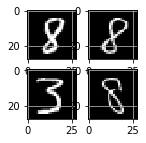

In [4]:
# 4개의 임의 표본 추출하기
indices=np.random.randint(0,x_train.shape[0],size=4)
images=x_train[indices]
labels=y_train[indices]
# 4개 표본 그림그리기
plt.figure(figsize=(2,2))
for i in range(len(indices)):
    plt.subplot(2,2,i+1)
    image=images[i]
    plt.imshow(image, cmap='gray')
    plt.grid('off')
plt.show()

In [5]:
# one-hot coding을 위한 라이브러리 불러오기
from tensorflow.keras.utils import to_categorical, plot_model

num_features=784  #x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(-1,num_features).astype('float32')# 또는 np.reshape(x_train, (-1,num_features)).astype('float32')
x_test=x_test.reshape(-1,num_features).astype('float32')

#reshape안에 '-1'대신 x_train.shape[0]을 써도 되지만 '-1'을 해줌으로써 해당 axis의 값을 스스로 계산하게 한다.
#예를 들어 x의 shape이 (100,200,3)일 때 x.reshape(-1,100)으로 하면 x의 shape은 (600,100)으로 된다.

x_train=x_train/255.
x_test=x_test/255.

# 10개의 범주형 자료를 one-hot 벡터로 바꿔주기
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_train.shape[1]
print(y_train.shape)

(60000, 10)


In [6]:
import os
import datetime
#logs_dir="./logs_1"
logs_dir="logs_1"
os.makedirs(logs_dir, exist_ok=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


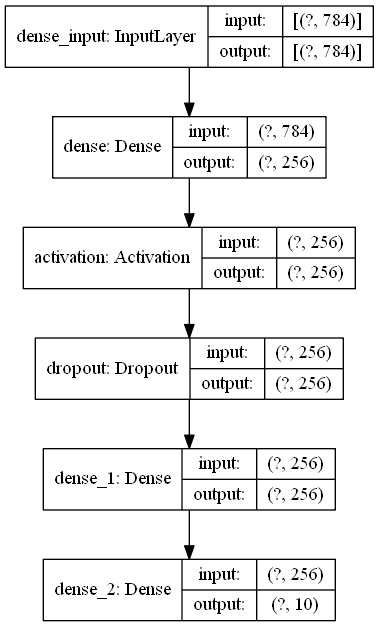

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

#2개의 은닉층과 1개의 출력층으로 구성된 MLP모형
model=Sequential()
model.add(Dense(256,input_dim=num_features)) #input은 1D tensor
model.add(Activation('relu'))
# 또는 model.add(Dense(256, input_dim=num_features,activation='relu'))로 Dense와 Activation을 함께 쓸 수 있음
model.add(Dropout(0.45))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()
plot_model(model,show_shapes=True)

In [8]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


In [9]:
logdir=os.path.join(logs_dir,datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_cb=tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64,validation_data=(x_val,y_val),callbacks=[tensorboard_cb])
history_out=history.history
history_out.keys()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 127us/sample - loss: 0.3389 - accuracy: 0.8973 - val_loss: 0.1509 - val_accuracy: 0.9545
Epoch 2/10
50000/50000 [==============================] - 4s 89us/sample - loss: 0.1657 - accuracy: 0.9479 - val_loss: 0.1092 - val_accuracy: 0.9662
Epoch 3/10
50000/50000 [==============================] - 5s 98us/sample - loss: 0.1330 - accuracy: 0.9592 - val_loss: 0.0909 - val_accuracy: 0.9728
Epoch 4/10
50000/50000 [==============================] - 5s 110us/sample - loss: 0.1120 - accuracy: 0.9648 - val_loss: 0.0870 - val_accuracy: 0.9753
Epoch 5/10
50000/50000 [==============================] - 6s 121us/sample - loss: 0.0968 - accuracy: 0.9691 - val_loss: 0.0787 - val_accuracy: 0.9760
Epoch 6/10
50000/50000 [==============================] - 6s 119us/sample - loss: 0.0873 - accuracy: 0.9713 - val_loss: 0.0788 - val_accuracy: 0.9772
Epoch 7/10
50000/50000 [============================

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

1. "localhost에서 연결을 거부했습니다" 메시지 나올 경우 --port 뒤의 포트 번호 변경 (8001, 8002 등)
2. "Launching TensorBoard..." 메시지 나올 경우 인터넷 주소창에 "localhost:xxxx" (xxxx는 지정한 포트번호) 입력

In [12]:
%load_ext tensorboard
%tensorboard --logdir {logs_dir} --port=8008

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
Traceback (most recent call last):
  File "c:\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\Scripts\tensorboard.exe\__main__.py", line 7, in <module>
  File "c:\anaconda3\lib\site-packages\tensorboard\main.py", line 59, in run_main
    default.get_plugins() + default.get_dynamic_plugins(),
  File "c:\anaconda3\lib\site-packages\tensorboard\default.py", line 110, in get_dynamic_plugins
    for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins')
  File "c:\anaconda3\lib\site-packages\tensorboard\default.py", line 110, in <listcomp>
    for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins')
  File "c:\anaconda3\lib\site-packages\pkg_resources\__init__.py", line 2461, in load
    self.require(*args, **kwargs)
  File "c:\anaconda3\lib\site-